<a href="https://colab.research.google.com/github/gabrieldilay/NaoSupervisionadoCovid/blob/main/CovidNaoSupervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
import pandas as pd

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import warnings
warnings.filterwarnings("ignore")

In [106]:
df = pd.read_csv('/content/drive/MyDrive/TrabNaoSupervisionado/2022-11-30_Casos_Covid_19_-_Base_de_Dados.csv',
                    sep=';', encoding='iso-8859-1')

In [107]:
df.head()

,DATA INCLUSÃO/ NOTIFICAÇÃO,CLASSIFICAÇÃO FINAL,IDADE (anos),SEXO,BAIRRO,DISTRITO RESIDÊNCIA,INTERNADO (SIM/NÃO),DATA COLETA EXAME,DATA ÓBITO,ENCERRAMENTO
0,11/03/2020,CONFIRMADO,54,M,CRISTO REI,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO
1,12/03/2020,CONFIRMADO,15,M,XAXIM,DSBQ,NÃO,08/03/2020,NaN,RECUPERADO
2,12/03/2020,CONFIRMADO,43,M,XAXIM,DSBQ,NÃO,09/03/2020,NaN,RECUPERADO
3,12/03/2020,CONFIRMADO,25,F,CRISTO REI,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO
4,12/03/2020,CONFIRMADO,58,M,MERCÊS,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5903 entries, 0 to 5902
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   DATA INCLUSÃO/ NOTIFICAÇÃO  5903 non-null   object
 1   CLASSIFICAÇÃO FINAL         5903 non-null   object
 2   IDADE (anos)                5903 non-null   int64 
 3   SEXO                        5903 non-null   object
 4   BAIRRO                      5877 non-null   object
 5   DISTRITO RESIDÊNCIA         5877 non-null   object
 6   INTERNADO (SIM/NÃO)         5903 non-null   object
 7   DATA COLETA EXAME           5903 non-null   object
 8   DATA ÓBITO                  281 non-null    object
 9   ENCERRAMENTO                5903 non-null   object
dtypes: int64(1), object(9)
memory usage: 461.3+ KB


## Limpeza e Tratamento dos dados

In [109]:
#Verificar os valores unicos da coluna CLASSIFICAÇÃO FINAL
df['CLASSIFICAÇÃO FINAL'].unique()

array(['CONFIRMADO'], dtype=object)

In [110]:
#Verificar os valores unicos da coluna ENCERRAMENTO
df['ENCERRAMENTO'].unique()

array(['RECUPERADO', 'ÓBITO CONF'], dtype=object)

In [111]:
#SUBSTITUIR OS VALORES POR NUMEROS
#RECUPERADO = 0, OBITO = 1, ATIVO = 2

df['ENCERRAMENTO'].replace({'RECUPERADO':0, 'ÓBITO CONF':1, 'ATIVO':2}, inplace=True)

In [112]:
df['ENCERRAMENTO'].unique()

array([0, 1])

In [113]:
#TROCAR O NOME DA COLUNA ENCERRAMENTO PARA STATUS
df.rename(columns={'ENCERRAMENTO': 'STATUS'}, inplace=True)

In [114]:
#TROCAR O NOME DA COLUNA IDADE (ANOS) PARA IDADE
df.rename(columns={'IDADE (anos)': 'IDADE'}, inplace=True)

In [115]:
#TROCAR O NOME DA COLUNA INTERNADO (SIM/NAO) PARA INTERNADO
df.rename(columns={'INTERNADO (SIM/NÃO)': 'INTERNADO'}, inplace=True)

In [116]:
df['INTERNADO'].unique()

array(['NÃO', 'SIM'], dtype=object)

In [117]:
#TROCANDO UM VALOR ERRADO sIM para SIM
df['INTERNADO'].replace({'sIM':'SIM'}, inplace=True)

In [118]:
df['INTERNADO'].unique()

array(['NÃO', 'SIM'], dtype=object)

In [119]:
#SUBSTITUIR VALORES DA COLUNA INTERNADO PARA NUMEROS
#NAO = 0 E SIM = 1
df['INTERNADO'].replace({'NÃO':0, 'SIM':1}, inplace=True)

In [120]:
df['SEXO'].unique()

array(['M', 'F'], dtype=object)

In [121]:
#SUBSTITUIR VALORES DA COLUNA SEXO PARA UM PADRAO
df['SEXO'].replace({'m':'M', 'f':'F'}, inplace=True)

In [122]:
df.head()

,DATA INCLUSÃO/ NOTIFICAÇÃO,CLASSIFICAÇÃO FINAL,IDADE,SEXO,BAIRRO,DISTRITO RESIDÊNCIA,INTERNADO,DATA COLETA EXAME,DATA ÓBITO,STATUS
0,11/03/2020,CONFIRMADO,54,M,CRISTO REI,DSMZ,0,09/03/2020,NaN,0
1,12/03/2020,CONFIRMADO,15,M,XAXIM,DSBQ,0,08/03/2020,NaN,0
2,12/03/2020,CONFIRMADO,43,M,XAXIM,DSBQ,0,09/03/2020,NaN,0
3,12/03/2020,CONFIRMADO,25,F,CRISTO REI,DSMZ,0,09/03/2020,NaN,0
4,12/03/2020,CONFIRMADO,58,M,MERCÊS,DSMZ,0,09/03/2020,NaN,0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5903 entries, 0 to 5902
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   DATA INCLUSÃO/ NOTIFICAÇÃO  5903 non-null   object
 1   CLASSIFICAÇÃO FINAL         5903 non-null   object
 2   IDADE                       5903 non-null   int64 
 3   SEXO                        5903 non-null   object
 4   BAIRRO                      5877 non-null   object
 5   DISTRITO RESIDÊNCIA         5877 non-null   object
 6   INTERNADO                   5903 non-null   int64 
 7   DATA COLETA EXAME           5903 non-null   object
 8   DATA ÓBITO                  281 non-null    object
 9   STATUS                      5903 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 461.3+ KB


In [124]:
#CRIAR NOVO DF APENAS COM AS COLUNAS QUE IREI USAR NA ANALISE
df2 = df.drop(columns = ['DATA INCLUSÃO/ NOTIFICAÇÃO', 'CLASSIFICAÇÃO FINAL', 'BAIRRO','DISTRITO RESIDÊNCIA', 'DATA COLETA EXAME', 'DATA ÓBITO'  ])
df.head()

,DATA INCLUSÃO/ NOTIFICAÇÃO,CLASSIFICAÇÃO FINAL,IDADE,SEXO,BAIRRO,DISTRITO RESIDÊNCIA,INTERNADO,DATA COLETA EXAME,DATA ÓBITO,STATUS
0,11/03/2020,CONFIRMADO,54,M,CRISTO REI,DSMZ,0,09/03/2020,NaN,0
1,12/03/2020,CONFIRMADO,15,M,XAXIM,DSBQ,0,08/03/2020,NaN,0
2,12/03/2020,CONFIRMADO,43,M,XAXIM,DSBQ,0,09/03/2020,NaN,0
3,12/03/2020,CONFIRMADO,25,F,CRISTO REI,DSMZ,0,09/03/2020,NaN,0
4,12/03/2020,CONFIRMADO,58,M,MERCÊS,DSMZ,0,09/03/2020,NaN,0


In [125]:
df2.head()

,IDADE,SEXO,INTERNADO,STATUS
0,54,M,0,0
1,15,M,0,0
2,43,M,0,0
3,25,F,0,0
4,58,M,0,0


In [126]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5903 entries, 0 to 5902
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IDADE      5903 non-null   int64 
 1   SEXO       5903 non-null   object
 2   INTERNADO  5903 non-null   int64 
 3   STATUS     5903 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 184.6+ KB


## Exploração dos dados

**IDADE**

In [127]:
import plotly.express as px

In [128]:
hist =  px.histogram (df2,  x = "IDADE", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Distribuição das idades') 
hist.show()

**GENERO**

In [129]:
df2['SEXO'].value_counts()

F    3099
M    2804
Name: SEXO, dtype: int64

In [130]:
import seaborn as sns

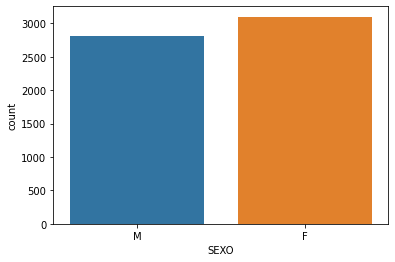

In [131]:
sns.countplot(x='SEXO', data=df2);

In [132]:
df2.shape

(5903, 4)

In [133]:
df2.describe()

,IDADE,INTERNADO,STATUS
count,5903.000000,5903.000000,5903.000000
mean,43.700999,0.219549,0.047603
std,17.653127,0.413976,0.212943
min,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000
50%,42.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000
max,96.000000,1.000000,1.000000


**Analise de outliers**

In [134]:
import plotly.express as px

In [135]:
boxplot = px.box(df2, y="IDADE")
boxplot.show()

In [136]:
df2.head()

,IDADE,SEXO,INTERNADO,STATUS
0,54,M,0,0
1,15,M,0,0
2,43,M,0,0
3,25,F,0,0
4,58,M,0,0


# Transformar variaveis categoricas em numericas

In [137]:
df2['SEXO'].replace({'F': 0, 'M': 1}, inplace=True)

In [138]:
df2.head()

,IDADE,SEXO,INTERNADO,STATUS
0,54,1,0,0
1,15,1,0,0
2,43,1,0,0
3,25,0,0,0
4,58,1,0,0


# Escalonamento

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [141]:
df2_esc

array([[ 0.58345885,  1.05128818, -0.53038764, -0.22356702],
       [-1.62596867,  1.05128818, -0.53038764, -0.22356702],
       [-0.03971301,  1.05128818, -0.53038764, -0.22356702],
       ...,
       [-0.5495809 , -0.95121396, -0.53038764, -0.22356702],
       [ 1.48989065,  1.05128818, -0.53038764, -0.22356702],
       [ 1.31993469,  1.05128818, -0.53038764, -0.22356702]])

## **K MEANS COM PCA**

In [142]:
df2_esc

array([[ 0.58345885,  1.05128818, -0.53038764, -0.22356702],
       [-1.62596867,  1.05128818, -0.53038764, -0.22356702],
       [-0.03971301,  1.05128818, -0.53038764, -0.22356702],
       ...,
       [-0.5495809 , -0.95121396, -0.53038764, -0.22356702],
       [ 1.48989065,  1.05128818, -0.53038764, -0.22356702],
       [ 1.31993469,  1.05128818, -0.53038764, -0.22356702]])

In [143]:
df2_esc.shape

(5903, 4)

**Componentes Principais**

In [144]:
from sklearn.decomposition import PCA

In [145]:
pca = PCA(n_components = 2)

In [146]:
df2_pca = pca.fit_transform(df2_esc)

In [147]:
df2_pca

array([[ 0.03064365, -0.94281916],
       [-1.19271952, -1.3261931 ],
       [-0.3144075 , -1.05095027],
       ...,
       [-0.88365326,  0.82343125],
       [ 0.53253623, -0.78553755],
       [ 0.43843137, -0.81502785]])

In [148]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.44305785, 0.247892  ])

In [149]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.6909498554548057

**Elbow Method**

In [150]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_pca)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

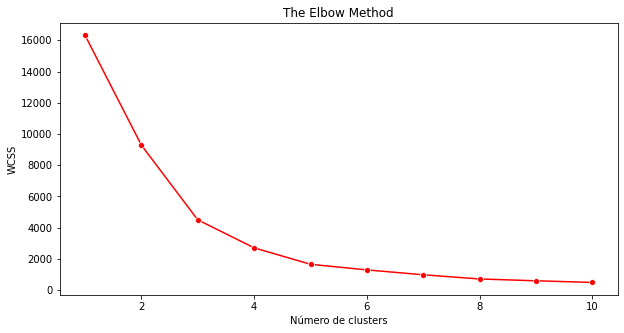

In [152]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [153]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [154]:
kmeans_fit = kmeans.fit(df2_pca)

In [155]:
# Coordenadas dos Centróides
centroides = kmeans_fit.cluster_centers_
centroides

array([[-0.67008533,  0.87767371],
       [-0.42235344, -1.0974081 ],
       [ 4.48355721,  0.44061976],
       [ 1.43571453, -0.17523494]])

In [156]:
# Classificação dos dados
classificacao = kmeans_fit.labels_
classificacao

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [157]:
classificacao[2]

1

In [158]:
import plotly.express as px
import plotly.graph_objects as go

In [159]:
graf1 = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [160]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,1
1,1
2,1
3,0
4,1
...,...
5898,0
5899,0
5900,0
5901,1


In [161]:
df2 = pd.concat([df2, agrupamento],axis=1)
df2

,IDADE,SEXO,INTERNADO,STATUS,Grupo
0,54,1,0,0,1
1,15,1,0,0,1
2,43,1,0,0,1
3,25,0,0,0,0
4,58,1,0,0,1
...,...,...,...,...,...
5898,46,0,0,0,0
5899,23,0,0,0,0
5900,34,0,0,0,0
5901,70,1,0,0,1


In [162]:
df2.iloc[125 , :]

IDADE        55
SEXO          1
INTERNADO     1
STATUS        0
Grupo         3
Name: 125, dtype: int64

In [163]:
grupo0 = df2.loc[df2.Grupo == 0]
grupo0 

,IDADE,SEXO,INTERNADO,STATUS,Grupo
3,25,0,0,0,0
5,57,0,0,0,0
6,27,0,0,0,0
7,26,0,0,0,0
8,52,0,0,0,0
...,...,...,...,...,...
5890,42,0,0,0,0
5896,88,0,0,0,0
5898,46,0,0,0,0
5899,23,0,0,0,0


In [164]:
grupo0.shape

(2615, 5)

## **Agrupamento Hierárquico com PCA**


In [165]:
df2_esc

array([[ 0.58345885,  1.05128818, -0.53038764, -0.22356702],
       [-1.62596867,  1.05128818, -0.53038764, -0.22356702],
       [-0.03971301,  1.05128818, -0.53038764, -0.22356702],
       ...,
       [-0.5495809 , -0.95121396, -0.53038764, -0.22356702],
       [ 1.48989065,  1.05128818, -0.53038764, -0.22356702],
       [ 1.31993469,  1.05128818, -0.53038764, -0.22356702]])

In [166]:
df2_esc.shape

(5903, 4)

**Componentes Principais**

In [167]:
from sklearn.decomposition import PCA

In [168]:
pca = PCA(n_components = 2)

In [169]:
df2_pca = pca.fit_transform(df2_esc)

In [170]:
df2_pca

array([[ 0.03064365, -0.94281916],
       [-1.19271952, -1.3261931 ],
       [-0.3144075 , -1.05095027],
       ...,
       [-0.88365326,  0.82343125],
       [ 0.53253623, -0.78553755],
       [ 0.43843137, -0.81502785]])

In [171]:
pca.explained_variance_ratio_

array([0.44305785, 0.247892  ])

In [172]:
pca.explained_variance_ratio_.sum()

0.6909498554548061

**Dendograma**

In [173]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
plt.figure(figsize=(10, 10))
dendrograma = dendrogram(linkage(df2_pca, method = 'ward')) #complete, single e ward (dados dispersos)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'complete')
classificacao = hier.fit_predict(df2_pca)

In [ ]:
classificacao

In [ ]:
import plotly.express as px

In [ ]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao)
graf.update_layout(width=800,height=500,title_text='Agrupamento Hierárquico')
graf.show()

**Agrupamento**

In [ ]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo2'])
agrupamento

In [ ]:
df_hc = pd.concat([df2, agrupamento],axis=1)
df_hc